In [ ]:
!pip install kaggle

In [1]:
# imprt dependencies
import os
import json
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# converts json object to python dictionary
kaggle= json.load(open('/content/drive/MyDrive/Sentiment analysis/kaggle.json'))

In [5]:
# setup kaggle api key as environment variables
os.environ['KAGGLE_USERNAME']=kaggle['username']
os.environ['KAGGLE_KEY']=kaggle['key']

In [6]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:02<00:00, 21.5MB/s]
100% 25.7M/25.7M [00:02<00:00, 11.9MB/s]


In [7]:
!ls

drive  imdb-dataset-of-50k-movie-reviews.zip  sample_data


In [8]:
# unzipping dataset
with ZipFile("/content/imdb-dataset-of-50k-movie-reviews.zip","r")as zip_ref:
  zip_ref.extractall()

In [9]:
!ls

 drive	'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   sample_data


In [10]:
data=pd.read_csv("IMDB Dataset.csv")

In [11]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
# checking for null values
data.isnull().sum()

,0
review,0
sentiment,0


In [13]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [15]:
# To check the imbalance between positive and negative reviews
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


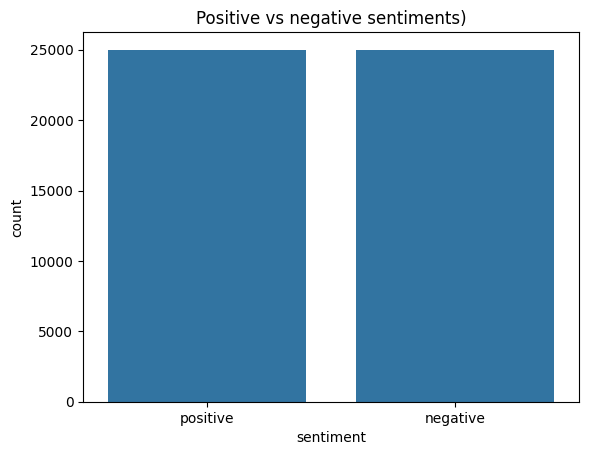

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting bar graph between positve and negative sentimenst
sns.countplot(x='sentiment', data=data)
plt.title('Positive vs negative sentiments)')
plt.show()


In [17]:
data.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

<ipython-input-17-a971eddbce1c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)


In [18]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Data Preprocessing

In [19]:
# Tokenizing to only 5000 most common words
tokenizer=Tokenizer(num_words=5000)

In [20]:
word_index = tokenizer.word_index
print(word_index)

{}


numbers are assigned on the basis of frequency of numbers.Most frequent words are assigned lower number and least frequent words are assigned higher numbers

In [21]:
tokenizer.fit_on_texts(data['review'])

In [22]:
padded_review=pad_sequences(tokenizer.texts_to_sequences(data['review']),maxlen=200)


In [23]:
X=padded_review
y=data['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape
X_test.shape

(10000, 200)

In [25]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [26]:
# Building the Long Short term memory
model=Sequential()
# 5000-total number of words in dataset,each word is represented by 128 dim vector,in a row total words=200)
model.add(Embedding(5000,128,input_length=200))
model.add(LSTM(128,dropout=0.2)) #Drop out to prevent overfitting
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 200))
# Build the model and display the summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print(X_train)

[[1993    1 1180 ...  206  352 3944]
 [  14    3 1625 ...   89  103    9]
 [   0    0    0 ...    2  712   64]
 ...
 [   0    0    0 ... 1611    2  601]
 [   0    0    0 ...  244  103  125]
 [   0    0    0 ...   70   72 2066]]


In [30]:
# Model Training
# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7664 - loss: 0.4757 - val_accuracy: 0.8449 - val_loss: 0.3772
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8828 - loss: 0.2966 - val_accuracy: 0.8893 - val_loss: 0.2799
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9125 - loss: 0.2249 - val_accuracy: 0.8913 - val_loss: 0.2757
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9271 - loss: 0.1907 - val_accuracy: 0.8884 - val_loss: 0.3159
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9460 - loss: 0.1482 - val_accuracy: 0.8814 - val_loss: 0.2966
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9540 - loss: 0.1248 - val_accuracy: 0.8708 - val_loss: 0.3448
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9648 - loss: 0.1023 - val_accuracy: 0.8864 - val_loss: 0.3249
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9693 -

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8804 - loss: 0.4443
Test Loss: 0.4466329514980316
Test Accuracy: 0.880299985408783


accuracy and loss is the accuracy and loss on training data

In [37]:
# 1. Sample new review or sentence for testing
new_review = ["I love you"]  # Example review text

# 2. Tokenize the new review (same as you did with training data)
new_review_sequence = tokenizer.texts_to_sequences(new_review)

# 3. Pad the sequence (to match the input length you used in the model)
new_review_padded = pad_sequences(new_review_sequence, maxlen=200)

# 4. Get the model's prediction
prediction = model.predict(new_review_padded)

# 5. Print the prediction (binary classification, you might use a threshold of 0.5)
if prediction > 0.5:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sentiment: Positive
